In [2]:
'''All packages'''

import geopandas as gpd
import pandas as pd
from shapely import geometry
from shapely.geometry import Polygon, LineString, Point
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt, mpld3
from mpld3 import fig_to_html, plugins

%matplotlib inline

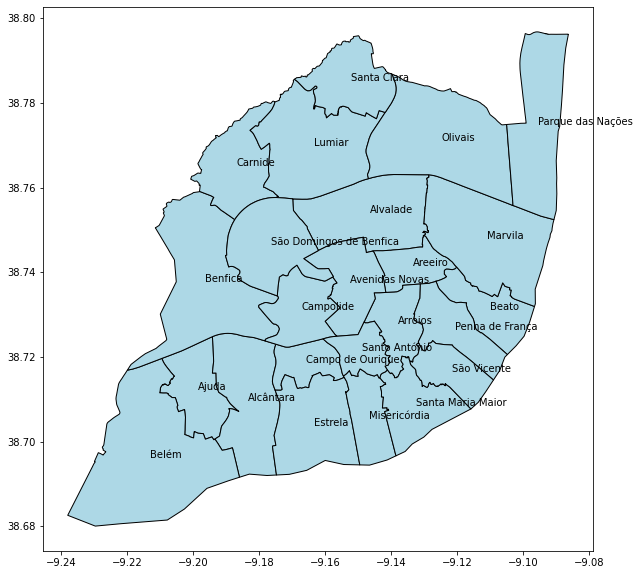

In [18]:
'''Simple Plot of Map Without Filter and Choropleth'''

plt.rcParams['figure.figsize'] = (20, 10) #setting parameters
df_places = gpd.read_file('./Lisboa.geojson') #read file Lisboa.geojson



axis = df_places.plot(color="lightblue", edgecolor='black') #plot of map Lisboa.geojson

#for to put the name of the regions
for idx, row in df_places.iterrows():
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy
    x, y = coordinates[0][0], coordinates[1][0]
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y)) 


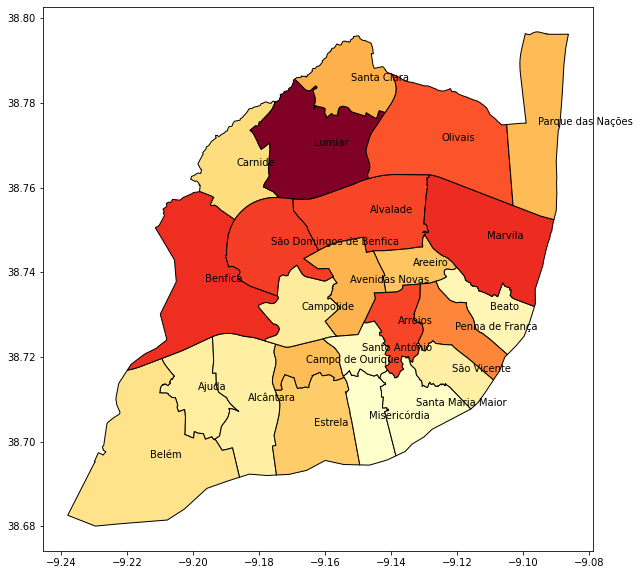

In [23]:
'''Plot of Map with Choropleth of Population'''


population = []

#appending all elements of geojson to convert to integer 
for idx, row in df_places.iterrows():
    population.append(row['Censos 2021 População Lisboa_POPULACAO RESIDENTE'])
    
#converting to integers
for a in range(0, len(population)):
    population[a] = int(population[a])


df_places["Censos 2021 População Lisboa_POPULACAO RESIDENTE"] = population
    

axis = df_places.plot(column = "Censos 2021 População Lisboa_POPULACAO RESIDENTE", 
                      edgecolor = "black",
                      cmap='YlOrRd')


for idx, row in df_places.iterrows():
    #print(row['geometry'].exterior.coords[1])
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

    #print(row['geometry'].centroid.wkt.replace('POINT ',''))
    x, y = coordinates[0][0], coordinates[1][0]
    #axis.scatter(x, y, s=10, color='red')
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y))  

ambiente:
       .\archives\ambiente\Amb_EcopontosSubterraneos.geojson
       .\archives\ambiente\Amb_Limpeza.geojson
       .\archives\ambiente\Ecopontos.geojson
       .\archives\ambiente\Jardins-Parques-urbanos.geojson
       .\archives\ambiente\Reciclagem.geojson
culturalazer:
       .\archives\culturalazer\Desporto_Instalacoes.geojson
       .\archives\culturalazer\Museus, bibliotecas e arquivos.geojson
economia:
       .\archives\economia\Centros Comerciais.geojson
       .\archives\economia\Feiras.geojson
       .\archives\economia\Mercados.geojson
educacao:
       .\archives\educacao\Escola Secundaria.geojson
       .\archives\educacao\escolas 1 ciclo.geojson
       .\archives\educacao\Escolas 1_Ciclo.geojson
saude:
       .\archives\saude\Farmacias.geojson
       .\archives\saude\Hospitais Publicos.geojson
seguranca:
       .\archives\seguranca\Administracao_Publica.geojson
transportes:
       .\archives\transportes\Estacoes Comboio.geojson
       .\archives\transportes\Estaco

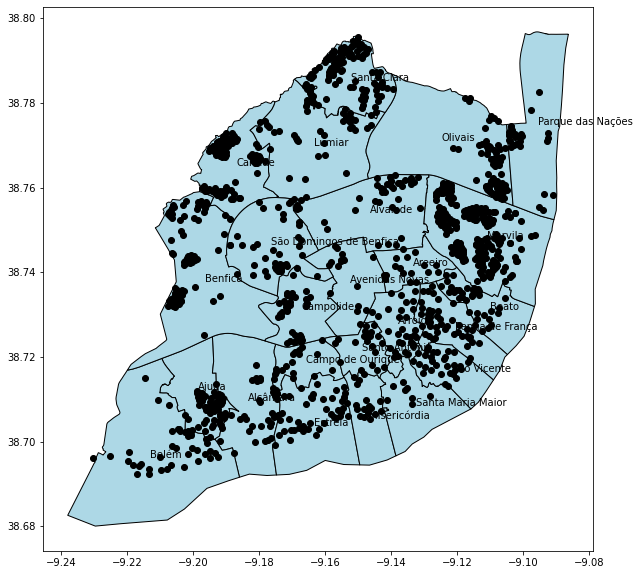

In [25]:
'''Filter and Plot of Map with the Points later'''

directory = "./archives"
ext = ".geojson"
lista=[]
listadirs=[]
dic={}


#function to filter the name of file 
def leitura(filtro):
    i=0
    global lista, listadirs, dic
    listafiles=[]
    for root, dirs, files in os.walk(directory):
        
        if len(dirs) > 0:
            listadirs = dirs

        if len(files) > 0:
            for value in files:
                listafiles.append(root.replace("/", "\\")+"\\"+value.replace("/","\\"))

            dic[listadirs[i]] = listafiles
            listafiles = []
            i+=1    
        
        for file in files:
            if file.endswith(ext):
                if filtro is not None:
                    if filtro.find(file.replace(".geojson","")) != -1:
                        ficheiro = os.path.join(root, file)
                        lista.append(gpd.read_file(ficheiro))

#useless
def pprint():
    for k,v in dic.items():
        print(k+":")
        for value in v:
            print("       "+ value)


    

leitura(None)
pprint()

a = input("Quais os filtros que deseja:")
leitura(a)


ax = lista[0].plot(color ="black", zorder =2)
axis = df_places.plot(ax=ax, color="lightblue",edgecolor = "black")

for idx, row in df_places.iterrows():
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

    x, y = coordinates[0][0], coordinates[1][0]
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y))  


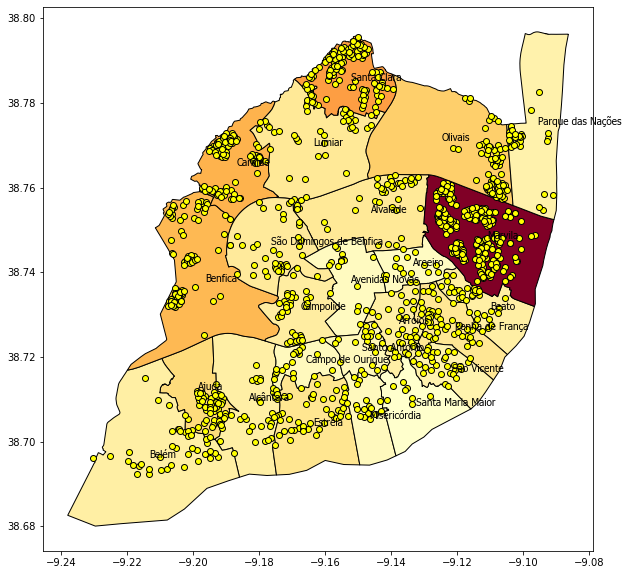

In [26]:
'''Choropleth with Points of Filter'''

listafilter = []
listafilted= []
count = []
number = []

df_places.NOME=sorted(df_places.NOME)

for idx, row in lista[0].iterrows():
    listafilter.append(row.geometry)
    
for ele in listafilter:
    if ele != None:
        listafilted.append(ele)
        
for a in listafilted:
    for idx1, row1 in df_places.iterrows():
            if a.intersects(row1.geometry) == True:
                count.append(row1.NOME)


for a in df_places.NOME:
    numb = count.count(a)
    number.append(numb) 
               
for a in range(0, len(number)):
    number[a] = int(number[a])
    
    
df_places.GlobalID=number  

ax = lista[0].plot(edgecolor = "black", color ="yellow", zorder =2)
axis = df_places.plot(ax=ax, edgecolor = "black", column = df_places.GlobalID, cmap= "YlOrRd", zorder=1)

for idx, row in df_places.iterrows():
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

    x, y = coordinates[0][0], coordinates[1][0]
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y), font ="Tahoma")  
                